# **Netflix Movies and TV Shows Clustering**


## Introduction to the Problem

Netflix has become a popular streaming platform over the years, with millions of viewers worldwide. As the platform continues to grow, so does the amount of content available to viewers. However, with such a large collection, it can be challenging for users to find what they want to watch. 

That's why Netflix uses data analytics and machine learning techniques to cluster its movies and TV shows and make personalized recommendations based on users' preferences.

## Dataset: Netflix Movies and TV shows

The Netflix dataset available on [Kaggle](https://www.kaggle.com/datasets/bansodesandeep/netflix-movies-and-tv-shows?resource=download) is a collection of data on movies and TV shows available on the Netflix platform. The dataset contains information on over 7,000 titles, including their title, type (movie or TV show), director, cast, country of origin, date added to Netflix, release year, rating, and description.

Each row of the dataset represents a single title and each column containing information about that title. The dataset also includes columns for the show's duration (in minutes for movies or seasons/episodes for TV shows) and for the show's genre. Additionally, the dataset contains information about the type of content rating that each title has received, such as PG, TV-MA, or R.

- **show_id**: The unique identifier for each movie or TV show on Netflix.
- **type**: Indicates whether the title is a movie or a TV show.
- **title**: The title of the movie or TV show.
- **director**: The name of the director of the movie or TV show.
- **cast**: The names of the actors or actresses in the movie or TV show.
- **country**: The country of origin for the movie or TV show.
- **date_added**: The date that the title was added to the Netflix platform.
- **release_year**: The year that the movie or TV show was released.
- **rating**: The content rating of the movie or TV show, such as PG, TV-MA, or R.
- **duration**: The duration of the movie or TV show, in minutes for movies or seasons/episodes for TV shows.
- **listed_in**: The genre or category of the movie or TV show.
- **description**: A brief description of the movie or TV show.

This dataset consists of tv shows and movies available on Netflix as of 2021. The dataset was collected from Fixable, which is a third-party Netflix search engine. 

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np

import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import SpectralClustering

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading data into a pandas dataframe. This dataset originally has 7787 rows or shows and 12 attributes, which are mostly string type.

In [ ]:
netflix = pd.read_csv("/content/Netflix_movies_and_tv_shows_clustering.csv")
netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
netflix.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [ ]:
netflix.shape

(7787, 12)

### Data Cleaning

There are not duplicated rows since each title is unique

In [ ]:
netflix.duplicated().sum()

0

A few columns have null values. The columns that present the most null values are *director*, *cast* and *country*.

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Comparison of null values by column. 

In [ ]:
netflix.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

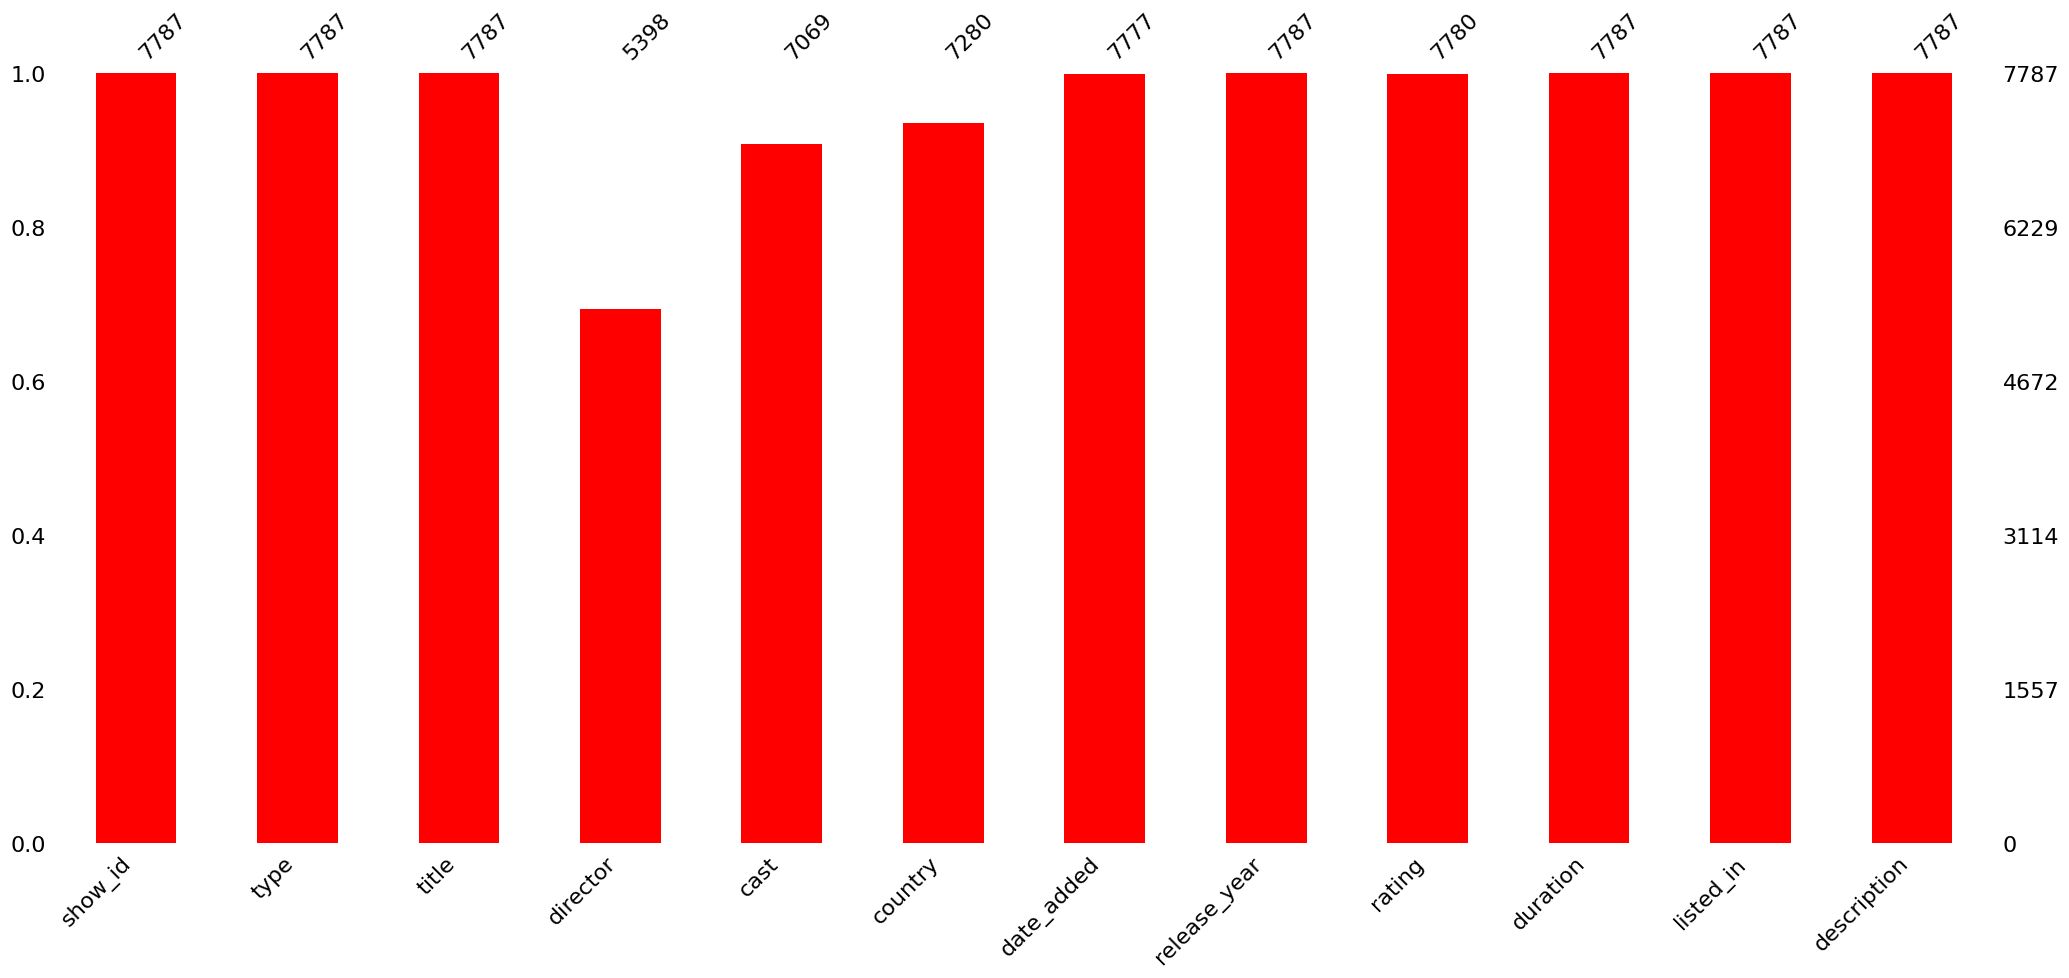

In [ ]:
msno.bar(netflix, color = 'red');

Null values in the *director* column were replace by an empty string. On the other hand, *country* null values were set as the mode value in this column. Finally, null values in *cast* were replaced by "No Cast".

In [ ]:
netflix['cast'].fillna('No cast',inplace=True)
netflix['country'].fillna(netflix['country'].mode()[0],inplace=True)
netflix['director'].fillna('', inplace=True)

*date_added* and *rating* columns have null values as well, but since the amount of null values in these columns are not significant, they were remove from the dataset.

In [ ]:
netflix.dropna(subset=['date_added','rating'],inplace=True)

Now, it is possible to start exploring the dataset since there are not missing or duplicated values as shown below. The shape of the dataset changed to 7770 observations as a results of this process.

In [ ]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

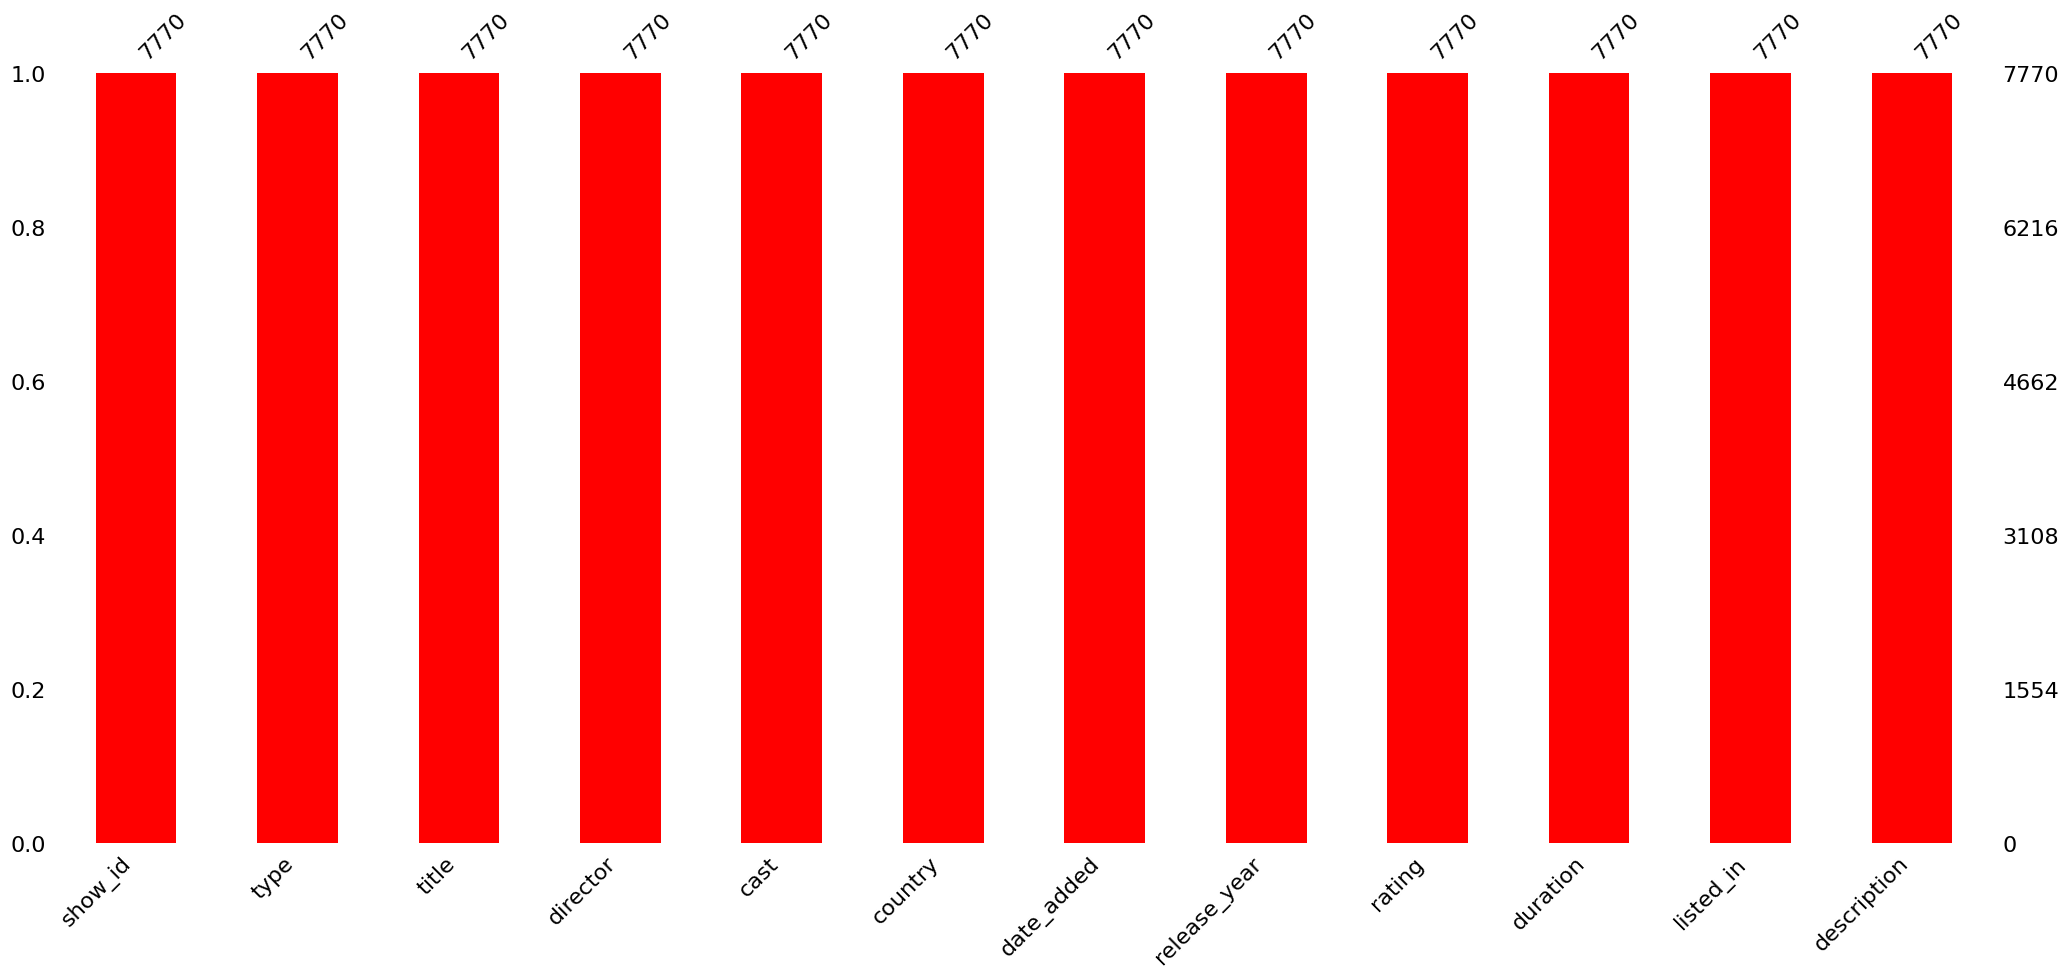

In [ ]:
msno.bar(netflix, color = 'red');

In [ ]:
netflix.shape

(7770, 12)

### Data Exploration

A comparison by content type shows that there are almost twice as many movies as TV shows on Netflix.

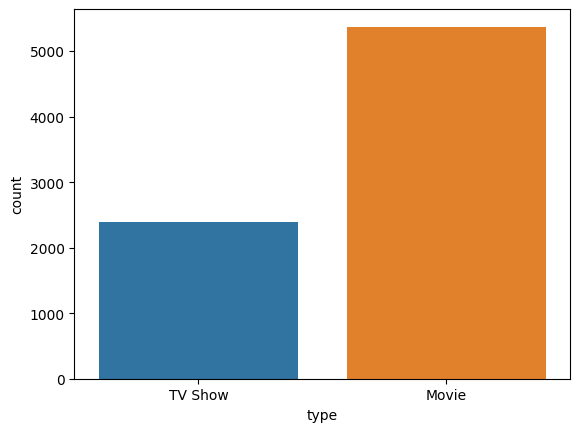

In [ ]:
sns.countplot(x=netflix['type'])
plt.show()

Below it is shown the top 10 genres. The most popular contents on Netflix are Documentaries, stand-up comedies, and Dramas, international movies.

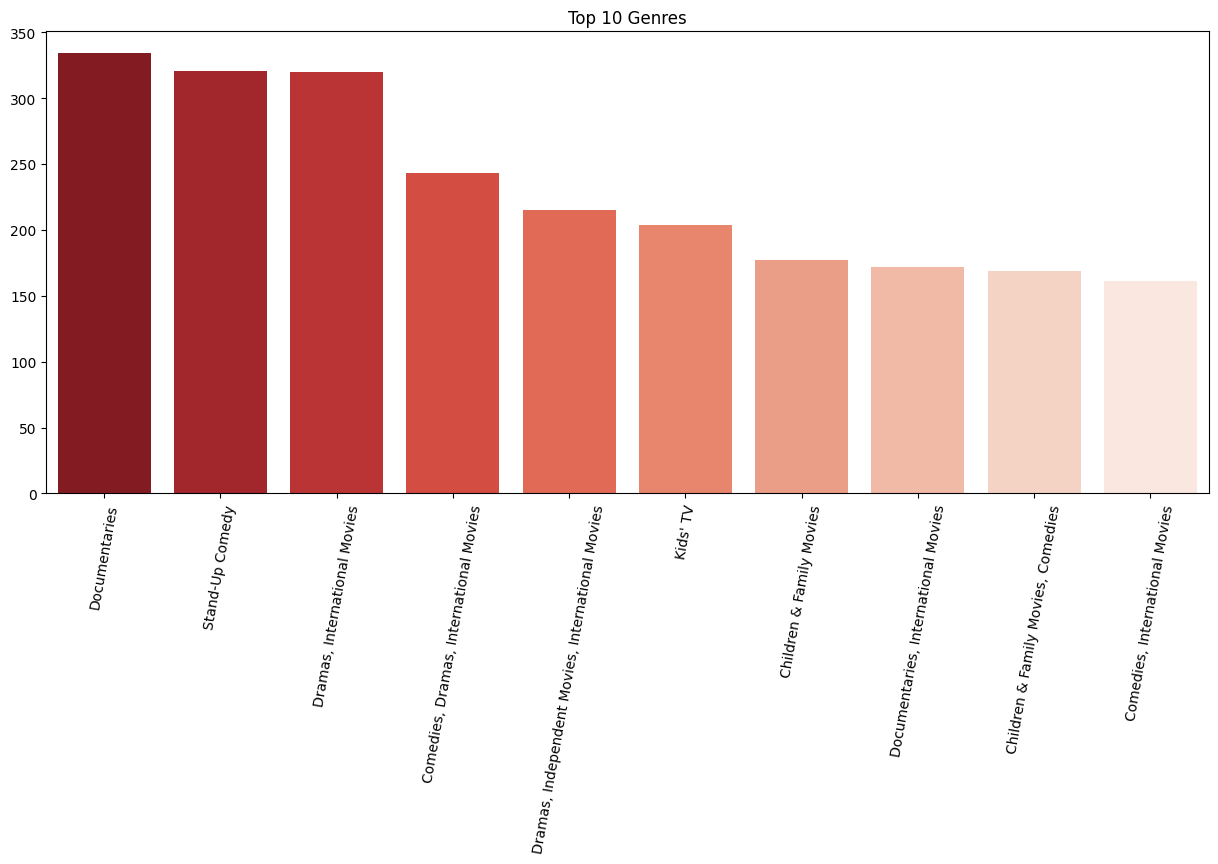

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x = netflix["listed_in"].value_counts().head(10).index,
            y = netflix["listed_in"].value_counts().head(10).values, 
            palette="Reds_r")
plt.xticks(rotation=80)
plt.title("Top 10 Genres")
plt.show()

According to the pie chart below, on netflix most content is rated as TV-MA and TV-14, which corresponds to content aimed at a mature and adolescent audience.

In [ ]:
netflix['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

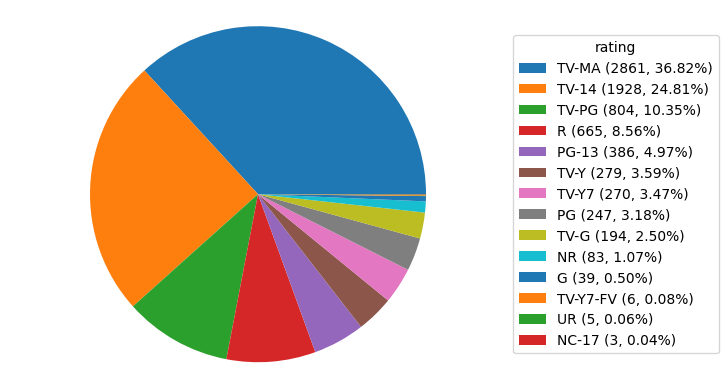

In [ ]:
counts = netflix['rating'].value_counts()
plt.pie(counts)

percentages = counts / counts.sum() * 100
legend_labels = [f'{label} ({count}, {percentage:.2f}%)' for label, count, percentage in zip(counts.index, counts, percentages)]
plt.legend(legend_labels, title='rating', loc='center left', 
           bbox_to_anchor=(1, 0.5))
plt.axis('equal')

plt.show()

Most content on the platform is produced in the following three countries: USA, India and UK.

In [ ]:
netflix.groupby(['country', 'type'])["show_id"].count().sort_values(
    ascending=False)

country                                                                         type   
United States                                                                   Movie      2076
                                                                                TV Show     975
India                                                                           Movie       852
United Kingdom                                                                  TV Show     203
                                                                                Movie       193
                                                                                           ... 
Indonesia, United States                                                        Movie         1
Iran, France                                                                    Movie         1
Ireland, Canada                                                                 Movie         1
Ireland, Canada, Luxembourg, United States, Unit

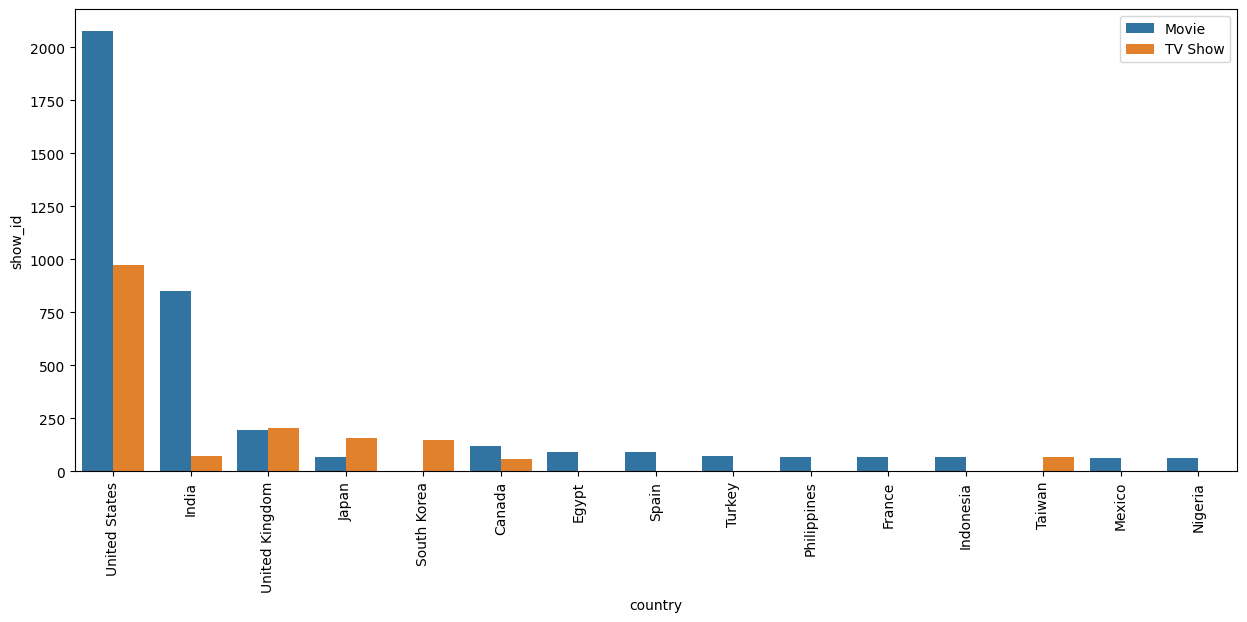

In [ ]:
netflix_country = netflix.groupby(['country', 'type'])['show_id'].count().sort_values(
    ascending = False).reset_index()
plt.figure(figsize = (15, 6))
sns.barplot(data = netflix_country, x = netflix_country['country'][:20], 
            y = netflix_country['show_id'], hue = 'type')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

It is possible to analyse the most common non-stopwords in the description and title columns to get an idea of the most relevant words. This helps to identify frequent topics in the data.

Based on the description wordcloud, it could be suggested that the shows on netflix are often centered on topics like family and friend relationships, self-development or overcoming adversities.

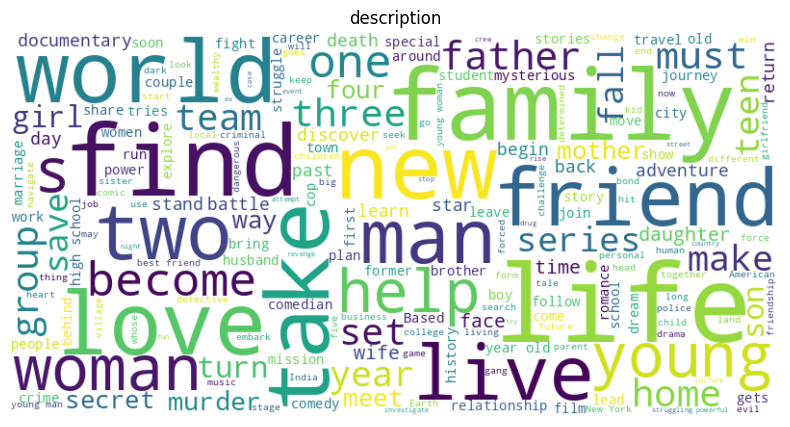

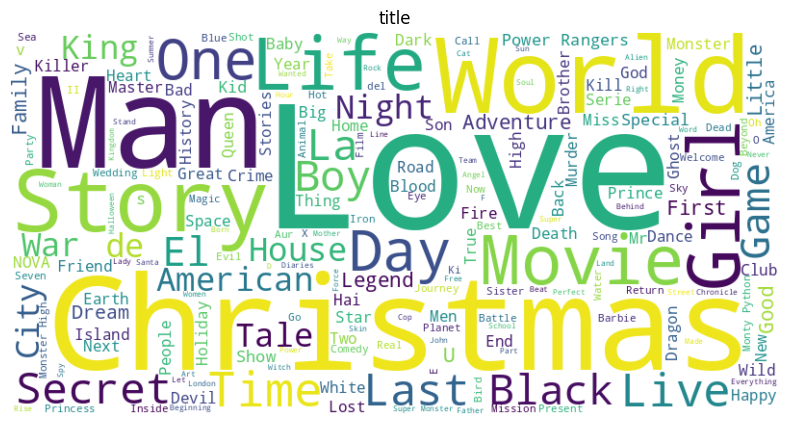

In [ ]:
features_for_wordplot = ['description', 'title']
for i in features_for_wordplot:

  df_word_cloud = netflix[i]
  text = " ".join(word for word in df_word_cloud)

  #stopwords = set(STOPWORDS)        
  
  wordcloud = WordCloud(width=800, height=400, stopwords=set(STOPWORDS) , 
                        background_color="white").generate(text)
  
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(i)
  plt.show()

## Text Data Pre-processing

In this part, text columns will be converted from human language into a numeric format so that the algorithms can learn from it.

To achieve this goal, it is possible to use Natural Language Preprocessing (NLP). First thing first, all relevant text columns (description, listed_in, country, cast and director) will be combined into a new column.

In [ ]:
netflix['text'] =  netflix['description'] + ' ' + netflix['listed_in'] + ' ' + netflix['country']+ ' ' + netflix['cast'] + ' '+ netflix['director']
netflix['text'] = netflix['text'].fillna("")
netflix['text'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows, TV Dramas, TV Sci-Fi & Fantasy Brazil João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi '

### Text Cleaning

One all text columns are merged into a single column, the data will be cleaned in order to keep just the relevant words.

Regular expression is a method that allows to manipulate string. In this case, it is helpful to remove all non-alphabetical characters. 

Then, all text is lowered case to avoid word distinction based on case.  

In [ ]:
netflix['text'] = netflix['text'].apply(
    lambda x: re.sub(r"[^a-zA-Z ]", "", str(x)))
netflix['text']= netflix['text'].str.lower()

And puntuaction characters are removed in order to reduce noise in the data and help in the process of tokenizing the text into individual words.

In [ ]:
netflix['text'] = netflix['text'].apply(lambda text: text.translate(
    str.maketrans('', '', string.punctuation)))
netflix['text'][0]

'in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor international tv shows tv dramas tv scifi  fantasy brazil joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi '

As the last part of the text-cleaning process, stopwords were removed. These stopwords are removed from the text since these words have no real value. By doing this, can help remove hoise and reduce the size of the dataset.

In [ ]:
netflix['text'] = netflix['text'].apply(lambda text: ' '.join([word for word in nltk.word_tokenize(text) if word.lower() not in stopwords.words('english')]))
netflix['text'][0]

'future elite inhabit island paradise far crowded slums get one chance join saved squalor international tv shows tv dramas tv scifi fantasy brazil joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi'

### Text Normalization

Normalizing text means converting a word to its root form. This process is also called stemming since converts affixes to suffixes and prefixes or to their root form. The normalized text is store in a new column called normalized.

In [ ]:
netflix['normalized'] = netflix['text'].apply(lambda text: ' '.join([SnowballStemmer('english').stem(word) for word in nltk.word_tokenize(text)]))
netflix['normalized'][0]

'futur elit inhabit island paradis far crowd slum get one chanc join save squalor intern tv show tv drama tv scifi fantasi brazil joo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschi'

### Text Vectorization

The next step is to vectorize the normalized data to measure the relevance of each term in a text. Here, it is used Term Frequency-Inverse Document Frequency. This method considers the importance of each word by assigning higher values to rare words unique to a particular document. In this context, the higher the score got more importance has a word.

First a new DF is created to map the data normalized with the respective titles.

In [ ]:
new_netflix = netflix[['title', 'normalized']]
new_netflix.head()

title                                         normalized
0     3%  futur elit inhabit island paradis far crowd sl...
1   7:19  devast earthquak hit mexico citi trap survivor...
2  23:59  armi recruit found dead fellow soldier forc co...
3      9  postapocalypt world ragdol robot hide fear dan...
4     21  brilliant group student becom cardcount expert...

Then, the data is vectorized:

In [ ]:
text_vectorizer = TfidfVectorizer()
X = text_vectorizer.fit_transform(new_netflix['normalized'])

In this way, the normalized data is translated by vectorization into many more numeric features.

In [ ]:
print(X.shape)
X.toarray()

(7770, 42083)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Dimensionality Reduction

Now, since the data has so many features, it is necessary to apply dimensionality reduction to keep the number of features that capture the maximum variance. In other words, this method allows to keep as much useful information as possible while removing redundat features. Here, it is used Principal Component Analysis. Through this algorithm is analysis the amount of features that explain most of the variance. From there, the data is being reduce to the amount that explain at least 90% of the variance.

In [ ]:
pca = PCA()
pca.fit(X.toarray())

PCA()

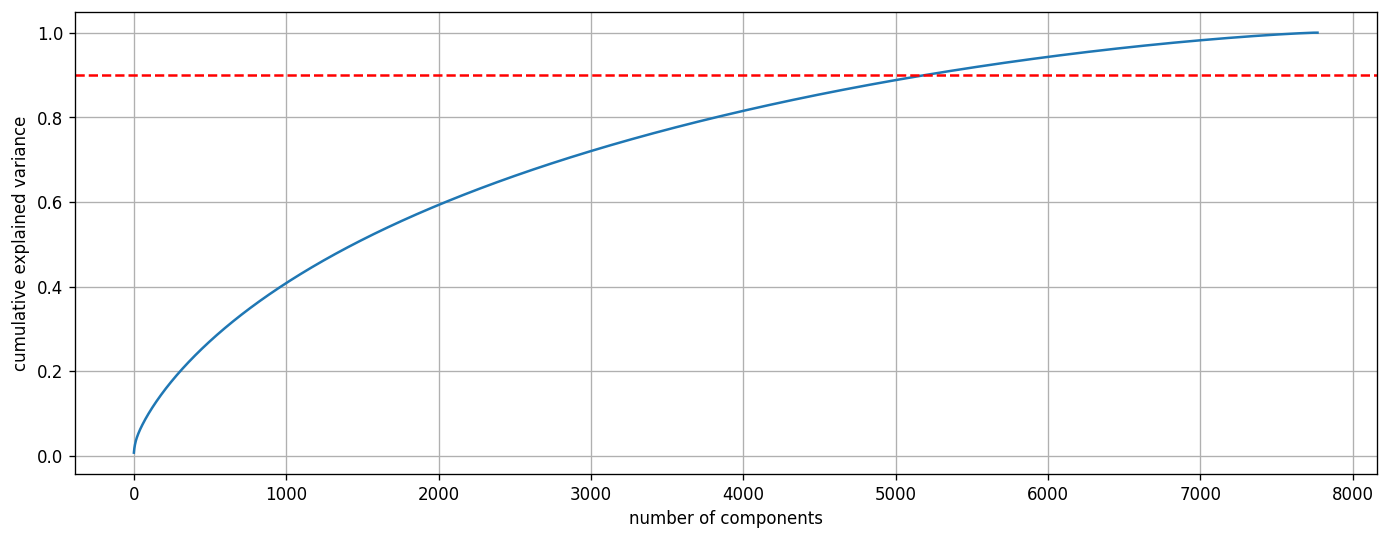

In [ ]:
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

From the chart above, it could be say that around 5000 components explain almost 90% of the variance

In [ ]:
np.cumsum(pca.explained_variance_ratio_)[5197]

0.9000299054029719

Then, the data is dimensioned to the amount of features that represent 90% of the features

In [ ]:
pca_tuned = PCA(n_components=0.90)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7770, 5198)

## Clustering 

Now, it is apply clustering to group data points that are more similar to each other than those in other groups. The aggrupation of the data is made based on the the features.

In this part, three clustering algorithms are implemented:
- K-Means
- Agglomerative
- Spectral

For each model, a complexity analysis is performed to find the best number of cluster that better group the data. 

### K-Means

The firts model consists of a K-means algorithm set with a maximum number of iteration of 300.

In order of analysing the complexity of the model, the algorithm is run serveral times modifying the number of cluster. At the same time, the complexity is analysed by computing the sum of squared values.

In [ ]:
sum_of_sq_dist = {} 
for k in range(1,11):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300, n_init=10, 
                random_state=0)
    km = km.fit(X_transformed)
    print(k, km.inertia_)
    sum_of_sq_dist[k] = km.inertia_

1 6915.192324356352
2 6868.999766609008
3 6847.352853702954
4 6829.0261490625035
5 6812.877552144926
6 6799.317954084468
7 6787.526565021748
8 6780.637067215138
9 6765.646066851471
10 6750.108636832199


Next, an elbow curve is plotted to analyse the relationship between the k value and the sum of the squared errors. Thus, the optimal value of k is determined for clustering the data.

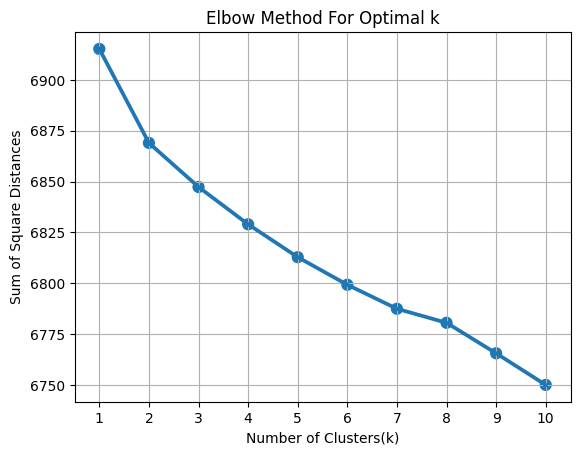

In [ ]:
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

From the elbow curve, it was determined an optimal k value of 7. Then, the k-means model is run again with this specific k value.

In [ ]:
kmeans= KMeans(n_clusters=7, init= 'k-means++')
kmeans.fit(X_transformed)

#label = kmeans.fit_predict(X_transformed)
label = kmeans.predict(X_transformed)

unique_labels = np.unique(label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


A scatter plot is used to display the clusters formed by the K-means model.

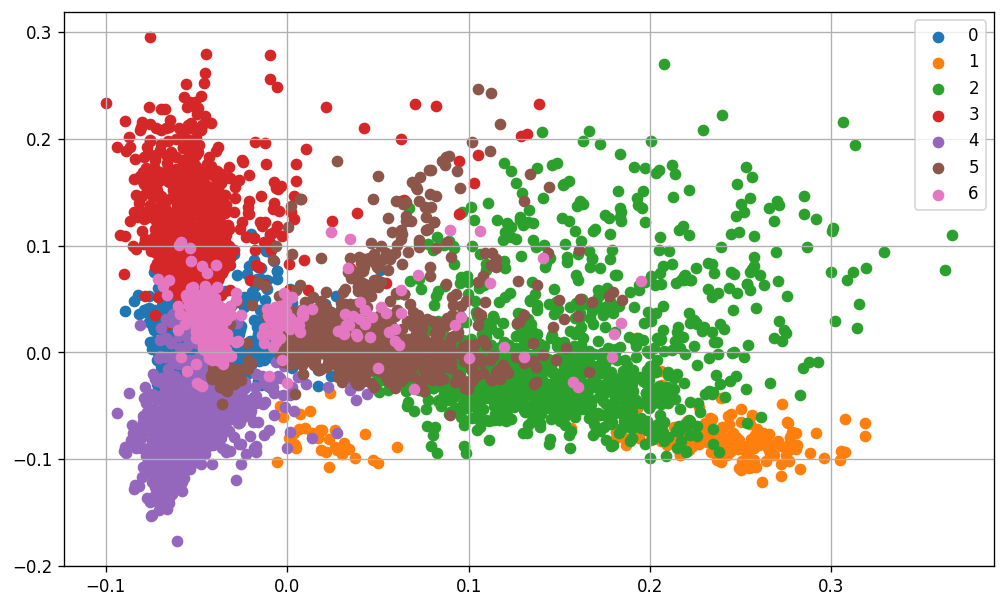

In [ ]:
plt.figure(figsize=(10,6), dpi=120)
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , 
                label = i)
plt.legend()
plt.grid()
plt.show()

In [ ]:
netflix['cluster_number'] = kmeans.labels_

Finally, for this model a wordcloud is created to indicates which observation are assigned to which cluster. Thus, it is possible to group and get an idea of the topics and how they were clustered by the algorithm. 

In [ ]:
def func_select_Category(cluster_label,column_of_choice):
  df_word_cloud = netflix[['cluster_number',column_of_choice]].dropna() #dropping null values
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==cluster_label] #dividing into different clusters
  text = " ".join(word for word in df_word_cloud[column_of_choice]) #rejoining words
  
  stopwords = set(STOPWORDS) 
  
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  
  plt.imshow(wordcloud, interpolation='blackman')  #imshow function displays the image on the current axes.
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

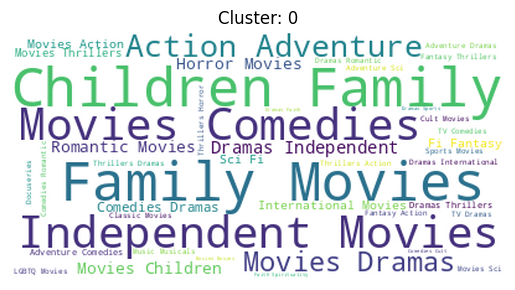

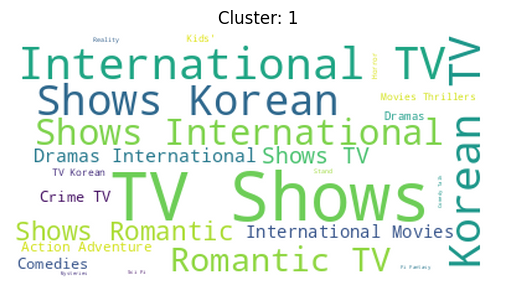

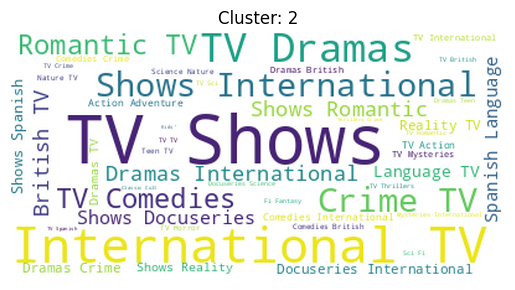

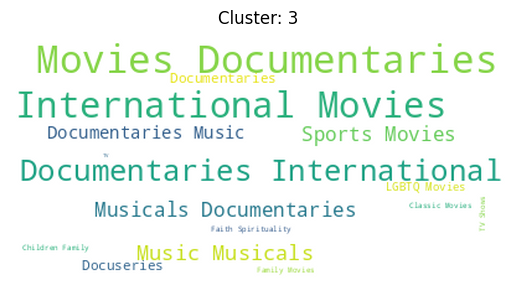

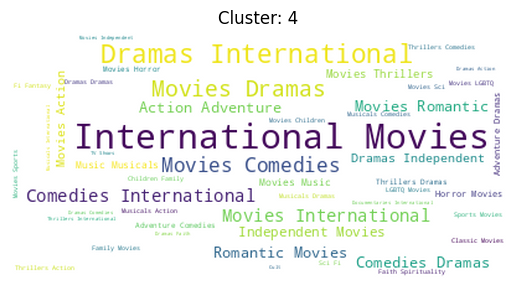

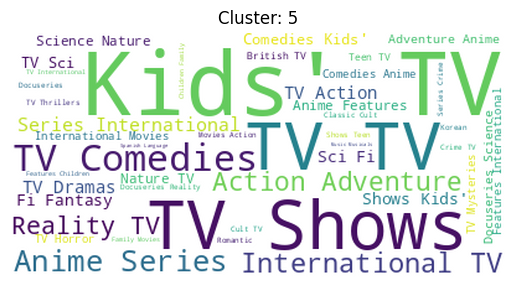

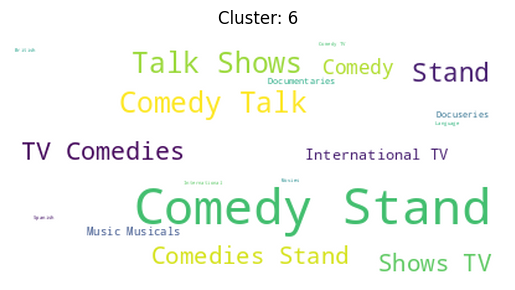

In [ ]:
for i in range(7):
  func_select_Category(i,'listed_in')

As it can seen above:
- Cluster6: Contains mainly comedy shows and stands.
- Cluster3: International content related to Documentaries or Sports.
- Cluster2: A mix between romantic and comenty content with a bit of drama.
- Cluster3: Action and adventure content, manly anime series.
- Cluster4: Musicals or shows with a music.
- Cluster5: Contains independent movies, which are classify often as international content. 
- Cluster5: It holds more content focused to family time-frame or addressed to children. 

### Agglomerative

This model was evaluated in a loop training the algorithm to cluster k values from 5 to 11. Then, the maximum silhoutte score was identify to find the optimal value of k.

In [ ]:
k_range = range(5, 11)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k) 
    labels = model.fit_predict(X_transformed) 
    score = silhouette_score(X, labels) 
    print("k=%d, Silhouette score=%f" % (k, score)) 

k=5, Silhouette score=0.000663
k=6, Silhouette score=0.001257
k=7, Silhouette score=0.001431
k=8, Silhouette score=0.001882
k=9, Silhouette score=0.002236
k=10, Silhouette score=0.001816


In this model, the optimal k value was indetify at k=9. So, the cluster for this values are identify again and display in a scatter plot.

In [ ]:
model = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', 
                                linkage = 'ward')
labels = model.fit_predict(X_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Since some clusters of observations overlap, the content grouping is better observed at the wordclouds below.

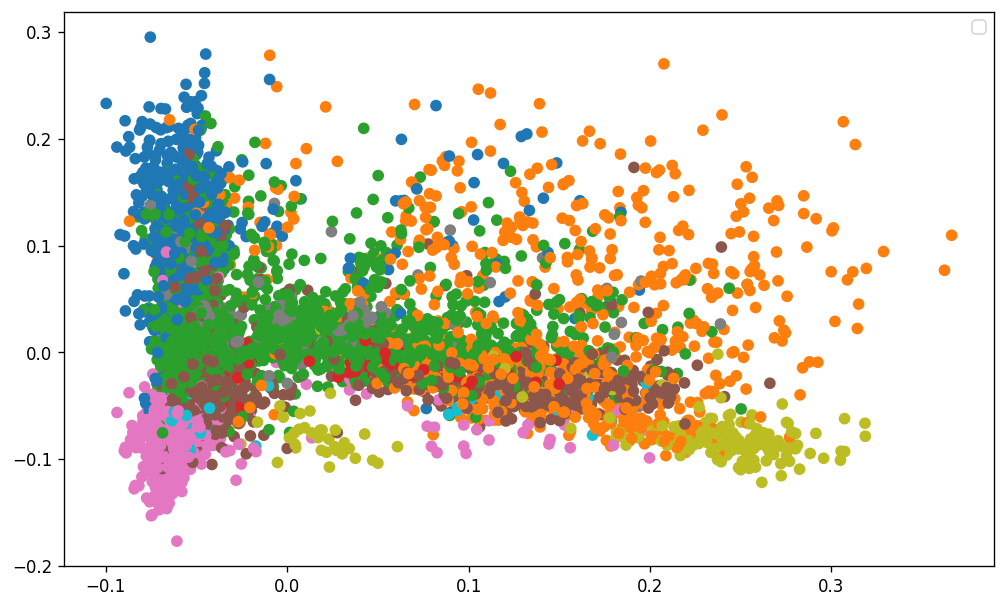

In [ ]:
plt.figure(figsize=(10,6), dpi=120)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='tab10')

plt.legend()
plt.show()

In [ ]:
# plt.figure(figsize=(10, 6), dpi=120)
# scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='tab10')

# unique_labels = np.unique(labels)
# legend_labels = [f"Label {label}" for label in unique_labels]
# plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# plt.show()

In [ ]:
netflix['cluster_number_agg_clustering'] = model.labels_

In [ ]:
def func_select_Category_agg_clustering(cluster_label,column_of_choice):
  df_word_cloud = netflix[['cluster_number_agg_clustering',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number_agg_clustering']==cluster_label]
  text = " ".join(word for word in df_word_cloud[column_of_choice])

  stopwords = set(STOPWORDS)
  
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  
  plt.imshow(wordcloud, interpolation='blackman')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

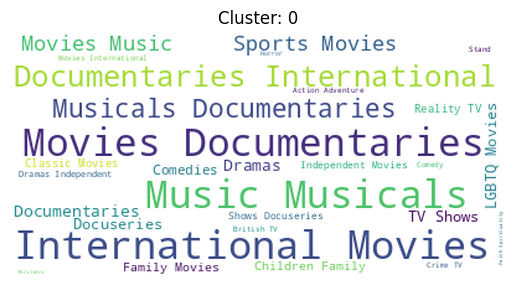

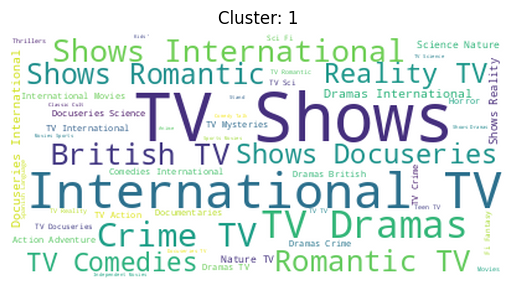

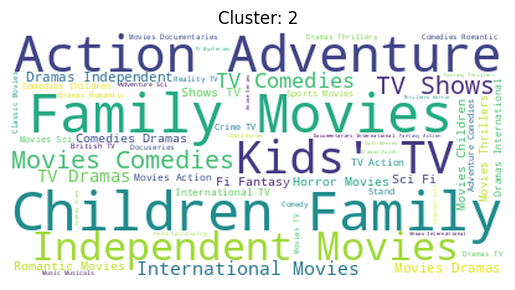

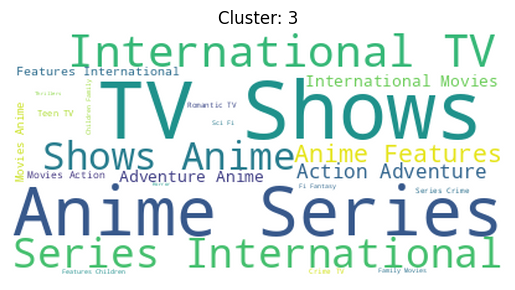

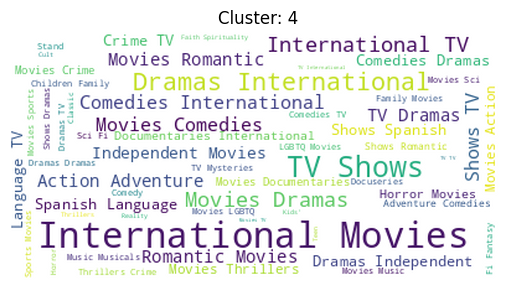

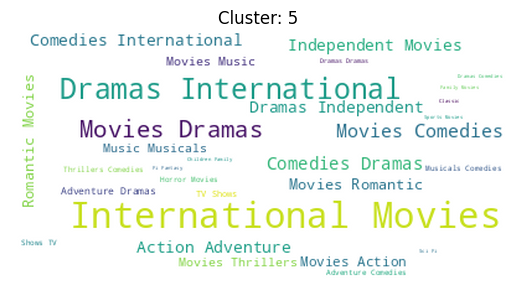

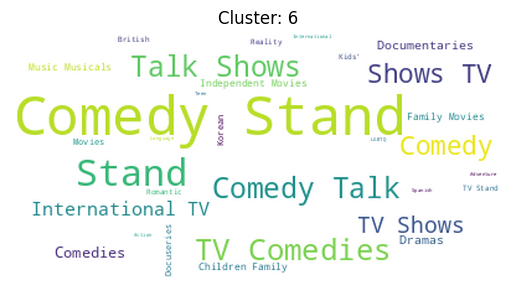

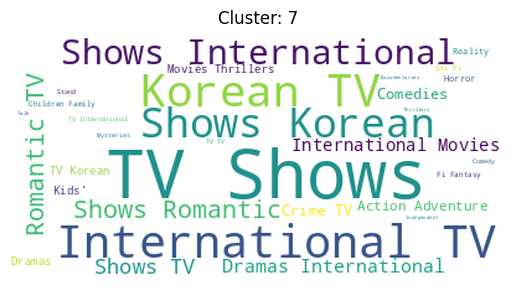

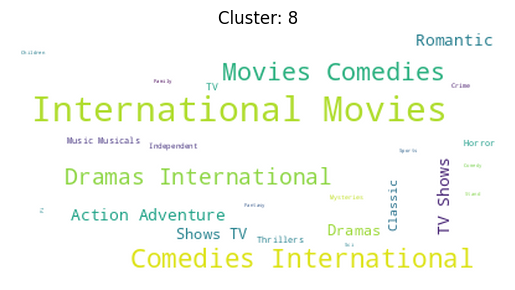

In [ ]:
for i in range(9):
  func_select_Category_agg_clustering(i,'listed_in')

### Spectral

The last clustering model that was trained is the Spectral Clustering Algorithm. In this model, the k values range from 10 to 20 in order to find the maximum Silhouette score. Then, the optimal k value was found at k=14.

In [ ]:
k_range = range(10, 20)
for k in k_range:
  clustering = SpectralClustering(n_clusters=k, random_state=0).fit(X_transformed)
  spec_labels = clustering.labels_
  score = silhouette_score(X, spec_labels)
  print("k=%d, Silhouette score=%f" % (k, score)) 

k=10, Silhouette score=0.005287
k=11, Silhouette score=0.005558
k=12, Silhouette score=0.005361
k=13, Silhouette score=0.005788
k=14, Silhouette score=0.006100
k=15, Silhouette score=0.005800
k=16, Silhouette score=0.005417
k=17, Silhouette score=0.005561
k=18, Silhouette score=0.005237
k=19, Silhouette score=0.005499


Based on the last analysis, the model was trained again with a k number of cluster set a 14.

In [ ]:
clustering = SpectralClustering(n_clusters=14, random_state=0).fit(X_transformed)
spec_labels = clustering.labels_

The cluster are represented using the first two features of the dataset, but since many clusters overlap this is better represented using the wordclouds where based on the content topics could be identify serveral trends.

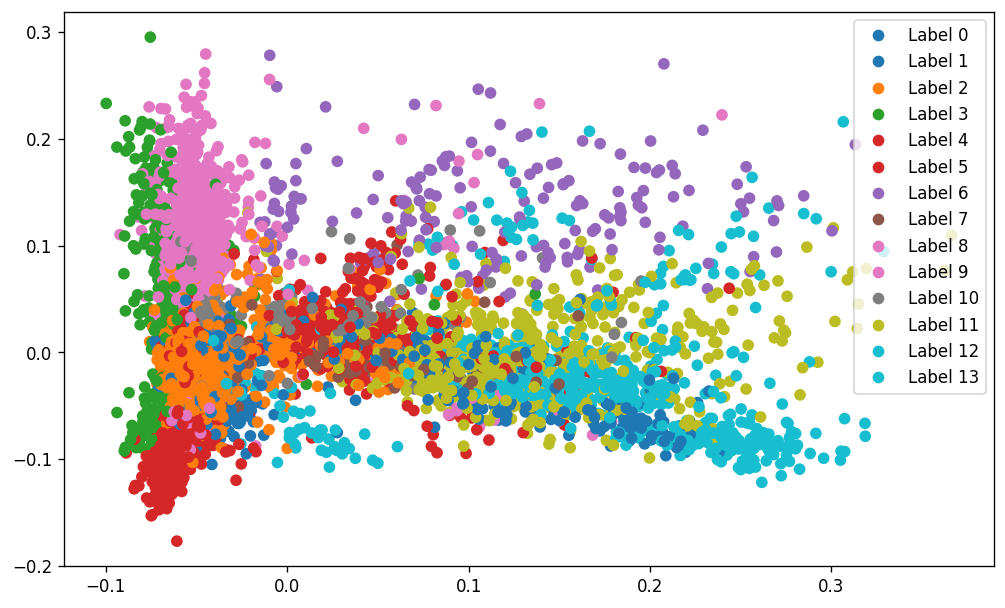

In [ ]:
plt.figure(figsize=(10, 6), dpi=120)
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=spec_labels, cmap='tab10')

unique_labels = np.unique(spec_labels)
legend_labels = [f"Label {label}" for label in unique_labels]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()

In [ ]:
netflix['spectral_cluster'] = spec_labels

In [ ]:
def func_select_Category(cluster_label,column_of_choice):
  df_word_cloud = netflix[['spectral_cluster',column_of_choice]].dropna() #dropping null values
  df_word_cloud = df_word_cloud[df_word_cloud['spectral_cluster']==cluster_label] #dividing into different clusters
  text = " ".join(word for word in df_word_cloud[column_of_choice]) #rejoining words
  
  stopwords = set(STOPWORDS) 
  
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  
  plt.imshow(wordcloud, interpolation='blackman')  #imshow function displays the image on the current axes.
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

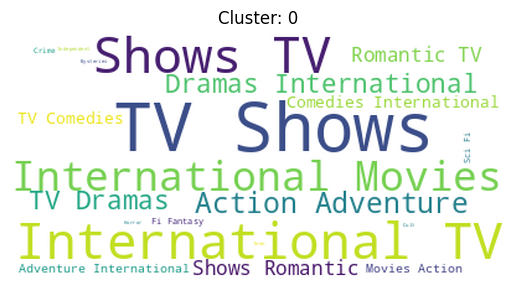

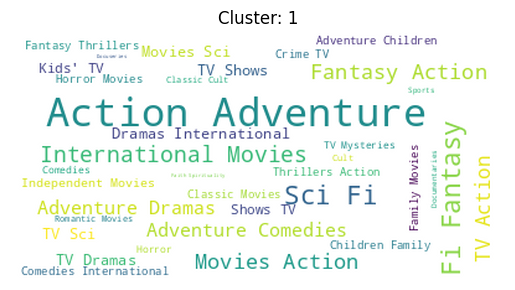

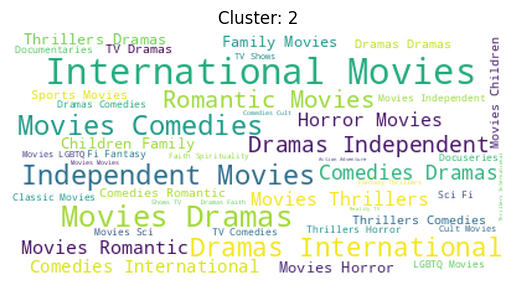

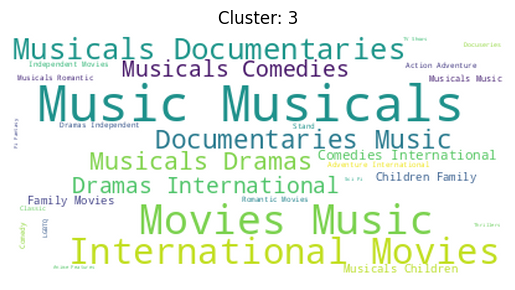

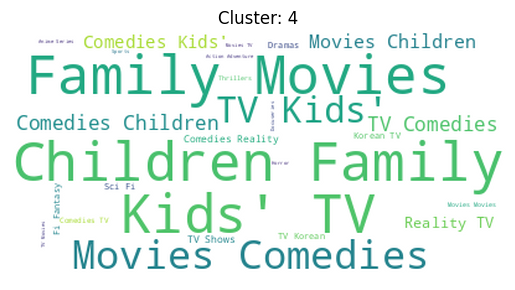

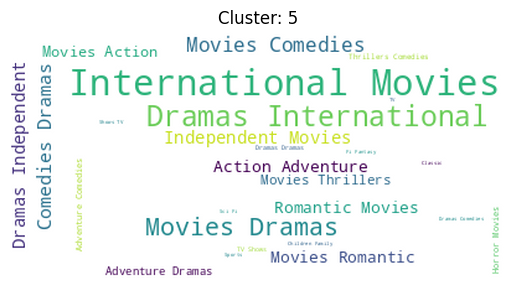

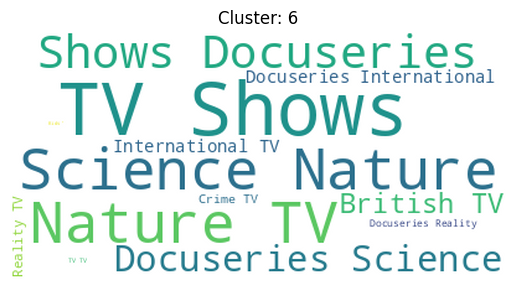

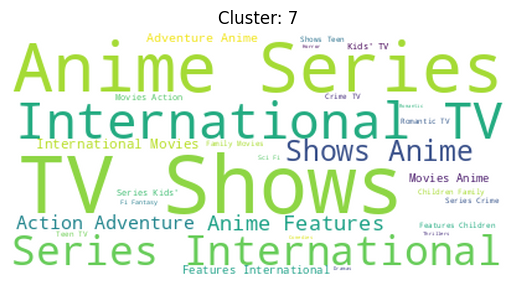

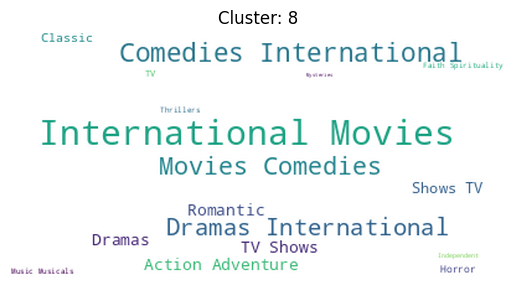

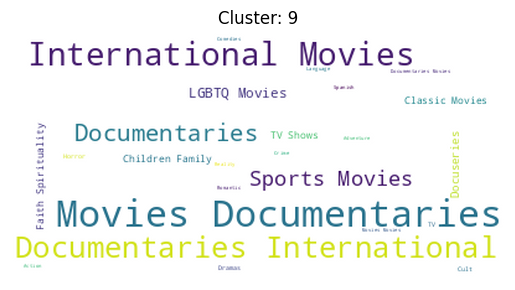

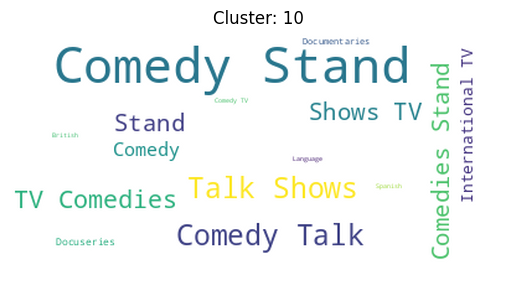

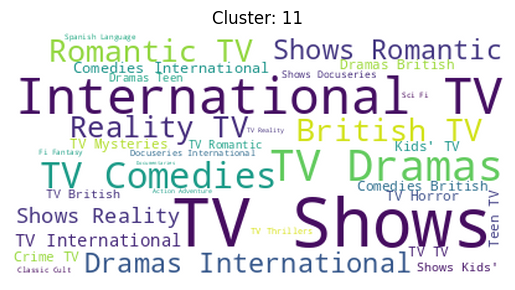

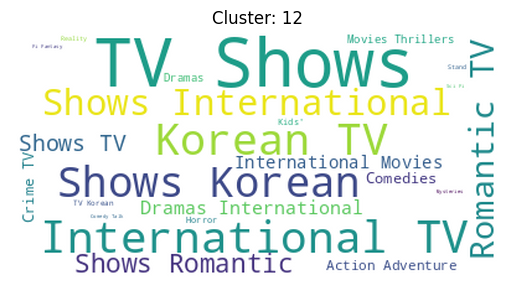

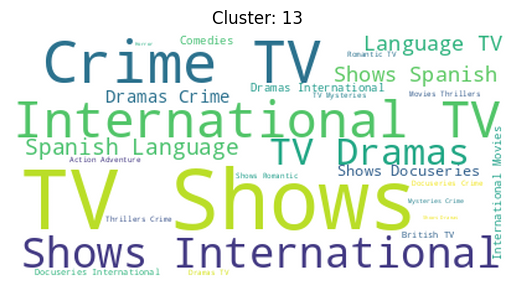

In [ ]:
for i in range(14):
  func_select_Category(i,'listed_in')

Here, it can be observed the different titles and the cluster that they belong to according to each model.

In [ ]:
netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                                text  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                          normalized  cluster_number  \
0  futur elit inhabit island paradis far crowd sl...               2   
1  devast earthquak hit mexico citi trap survivor...               4   
2  armi recruit found dead fellow soldier forc co...               4   
3  postapocalypt world ragdol robot hide fear dan...               0   
4  brilliant group student becom cardcount expert...               0   

   cluster_number_agg_clustering  spectral_cluster  
0                              4                11  
1                              4                 2  
2                              4                 2  
3                              2                 1  
4                              2                 2

In [ ]:
# Save DataFrame to a CSV file
new_netflix.to_csv('clustered_new_netflix.csv', index=False)
netflix.to_csv('clustered_netflix.csv', index=False)

## Recommender System

The last part of this project consist on recommend content based on a movie or tv show title. To achieve this goal, a specific title will be compared to the others to identify the ones that have a higher measure of similarity.

First, all normalized data is vectorized again while removing stopwords. In this process a vectorized matrix is created with the data, this transformation generates a new data table with the same amount of rows (7770), but with a feature column by unique word with its score in the normalized data column.

In [ ]:
netflix2 = pd.read_csv("/content/clustered_netflix.csv")
new_netflix2 = pd.read_csv("/content/clustered_new_netflix.csv")

In [ ]:
netflix2.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                                text  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                          normalized  cluster_number  \
0  futur elit inhabit island paradis far crowd sl...               2   
1  devast earthquak hit mexico citi trap survivor...               4   
2  armi recruit found dead fellow soldier forc co...               4   
3  postapocalypt world ragdol robot hide fear dan...               0   
4  brilliant group student becom cardcount expert...               0   

   cluster_number_agg_clustering  spectral_cluster  
0                              4                11  
1                              4                 2  
2                              4                 2  
3                              2                 1  
4                              2                 2

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix2['normalized'])

tfidf_matrix.shape

(7770, 41957)

To compare the similarity between text is used the cosine similarity measure. This measure quantifies the similirity between two vectors by computing the consine of the angle between them. Thus, it is captured the level of overlaping between the two vectors.

Additionaly, this method is used because is effective when handleing high dimensional data.

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix) 
programme_list=new_netflix2['title'].to_list()

In [ ]:
def recommend(title, cosine_similarity=cosine_sim):
    #find the index of the title queried
    index = programme_list.index(title)   
    #list of similarity scores      
    sim_score = list(enumerate(cosine_sim[index])) 
    
    #sort list by similarity score
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] 
    
    #selecting index of recommended movies
    recommend_index = [i[0] for i in sim_score]  
    rec_movie = new_netflix2['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommended movie','Similarity(0-1)'])
    return rec_table

In [ ]:
recommend("The Originals")

Recommended movie  Similarity(0-1)
0            The Vampire Diaries           0.1607
1            H2O: Just Add Water           0.1602
2  Fear Files... Har Mod Pe Darr           0.1433
3                         Bitten           0.1327
4                       Legacies           0.1296
5                       The 4400           0.1126
6             The Little Vampire           0.1046
7                  L.A.’s Finest           0.1002
8                        Dracula           0.0990
9                      The Flash           0.0968

In order to get advange from the clustering model trained to make the recommendations, the data is segmented to the content grouped in the same cluster as the title entered. 

In [ ]:
def recommend3(title):
    tfidf = TfidfVectorizer(stop_words='english')
    cluster_netflix = netflix2[netflix2.spectral_cluster == netflix2[netflix2["title"]==title].spectral_cluster.values[0]]["normalized"]
    tfidf_matrix = tfidf.fit_transform(cluster_netflix)

    cluster_new_netflix = new_netflix2.loc[netflix2[netflix2.spectral_cluster == netflix2[netflix2["title"]==title].spectral_cluster.values[0]].index]["title"]
    cosine_sim = cosine_similarity(tfidf_matrix) 
    programme_list=cluster_new_netflix.to_list()

    #find the index of the title queried
    index = programme_list.index(title)   
    #list of similarity scores      
    sim_score = list(enumerate(cosine_sim[index])) 
    
    #sort list by similarity score
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] 
    
    #selecting index of recommended movies
    recommend_index = [i[0] for i in sim_score]  
    rec_movie = cluster_new_netflix.iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommended movie','Similarity(0-1)'])
    return rec_table

In [ ]:
recommend3("Dracula")

Recommended movie  Similarity(0-1)
0     Fear Files... Har Mod Pe Darr           0.1156
1                    Penny Dreadful           0.1007
2  Monty Python's Fliegender Zirkus           0.0919
3           Interior Design Masters           0.0912
4                            Merlin           0.0887
5                          Sherlock           0.0830
6                     Sunny Bunnies           0.0822
7   Great Interior Design Challenge           0.0791
8           The Great Train Robbery           0.0772
9                          Vampires           0.0770

Finally, it is possible to save the cosine scores into a pickle file to use them later in any application or service.

In [ ]:
pickle.dump(new_netflix2.to_dict(), open('movie_dict.pkl', 'wb'))

In [ ]:
pickle.dump(cosine_sim, open('cosine_sim.pkl', 'wb'))

In [ ]:
similarity = pickle.load(open('cosine_sim.pkl', 'rb')) 
movie_dict = pickle.load(open('movie_dict.pkl', 'rb')) 
movies = pd.DataFrame(movie_dict)

programme_list=movies['title'].to_list()

In [ ]:
def recommend2(movie):
    index = programme_list.index(movie)         
    sim_score = list(enumerate(similarity[index])) 
    
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:6]  
    recommend_index = [i[0] for i in sim_score] 
    rec_movie = movies['title'].iloc[recommend_index] 

    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommended movie','Similarity(0-1)'])
   
    return rec_table

In [ ]:
recommend2("The Originals")

Recommended movie  Similarity(0-1)
0            The Vampire Diaries           0.1607
1            H2O: Just Add Water           0.1602
2  Fear Files... Har Mod Pe Darr           0.1433
3                         Bitten           0.1327
4                       Legacies           0.1296